В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
file_path = '/content/drive/MyDrive/ML Course/cars.csv'

In [172]:
df = pd.read_csv(file_path)


In [173]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [174]:
print("Типи даних колонок:")
print(df.dtypes)
print()

print("Загальна інформація:")
df.info()


Типи даних колонок:
Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

Загальна інформація:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   M

In [175]:
for col in df.columns:
    types_in_col = df[col].apply(type).value_counts()
    print(f"\nКолонка: {col}")
    print(types_in_col)



Колонка: Car_ID
Car_ID
<class 'int'>    100
Name: count, dtype: int64

Колонка: Brand
Brand
<class 'str'>    100
Name: count, dtype: int64

Колонка: Model
Model
<class 'str'>    100
Name: count, dtype: int64

Колонка: Year
Year
<class 'int'>    100
Name: count, dtype: int64

Колонка: Kilometers_Driven
Kilometers_Driven
<class 'int'>    100
Name: count, dtype: int64

Колонка: Fuel_Type
Fuel_Type
<class 'str'>    100
Name: count, dtype: int64

Колонка: Transmission
Transmission
<class 'str'>    100
Name: count, dtype: int64

Колонка: Owner_Type
Owner_Type
<class 'str'>    100
Name: count, dtype: int64

Колонка: Mileage
Mileage
<class 'int'>    100
Name: count, dtype: int64

Колонка: Engine
Engine
<class 'int'>    100
Name: count, dtype: int64

Колонка: Power
Power
<class 'int'>    100
Name: count, dtype: int64

Колонка: Seats
Seats
<class 'int'>    100
Name: count, dtype: int64

Колонка: Price
Price
<class 'int'>    100
Name: count, dtype: int64


In [176]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object','category','bool']).columns

print("Числові колонки:", list(numeric_cols))
print("Категоріальні колонки:", list(categorical_cols))


Числові колонки: ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
Категоріальні колонки: ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']


In [177]:
for col in categorical_cols:
    print(f"\n{col}")
    print("Унікальні значення:", df[col].unique())
    print("Кількість категорій:", df[col].nunique())



Brand
Унікальні значення: ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
Кількість категорій: 11

Model
Унікальні значення: ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']
Кількість категорій: 58

Fuel_Type
Унікальні значення: ['Petrol' 'Diesel']
Кількість категорій: 2

Transmission
Унікальні значення: ['Manual' 'Automatic']
Кількість категорій: 2

Owner_Type
Унікальні значення: ['First' 'Second' 'Third']
Кількість категорій: 3


**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [178]:
y = df['Price']

X = df.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12
)

X_train.shape, X_test.shape


((80, 12), (20, 12))

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [179]:
fuel_counts = X_train['Fuel_Type'].value_counts()
trans_counts = X_train['Transmission'].value_counts()

print(fuel_counts)
print(trans_counts)

fuel_major = fuel_counts.idxmax()
trans_major = trans_counts.idxmax()

print("Fuel majority:", fuel_major)
print("Transmission majority:", trans_major)



Fuel_Type
Petrol    41
Diesel    39
Name: count, dtype: int64
Transmission
Automatic    49
Manual       31
Name: count, dtype: int64
Fuel majority: Petrol
Transmission majority: Automatic


In [180]:
# Fuel_Type
X_train['Fuel_Type_Code'] = (X_train['Fuel_Type'] == fuel_major).astype(int)
X_test['Fuel_Type_Code'] = (X_test['Fuel_Type'] == fuel_major).astype(int)

# Transmission
X_train['Transmission_Code'] = (X_train['Transmission'] == trans_major).astype(int)
X_test['Transmission_Code'] = (X_test['Transmission'] == trans_major).astype(int)


In [181]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

ohe.fit(X_train[['Brand']])

brand_train = ohe.transform(X_train[['Brand']])
brand_test = ohe.transform(X_test[['Brand']])

brand_cols = ohe.get_feature_names_out(['Brand'])

brand_train_df = pd.DataFrame(brand_train, columns=brand_cols, index=X_train.index)
brand_test_df = pd.DataFrame(brand_test, columns=brand_cols, index=X_test.index)

X_train = pd.concat([X_train, brand_train_df], axis=1)
X_test = pd.concat([X_test, brand_test_df], axis=1)


In [182]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [183]:
top_models = X_train['Model'].value_counts().nlargest(5).index

X_train['Model_group'] = X_train['Model'].apply(lambda x: x if x in top_models else 'Other')
X_test['Model_group'] = X_test['Model'].apply(lambda x: x if x in top_models else 'Other')


Очікуваний результат після трансформацій:

In [184]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Model_group
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,T-Roc
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A5
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Other
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Other


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Model_group
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Other
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Other
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Other
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Other
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Other


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [185]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_test_num =

train_full = pd.concat([X_train_num, y_train], axis=1)

corr_matrix = train_full.corr()

corr_matrix['Price'].sort_values(ascending=False)


,Price
Price,1.000000
Power,0.849137
Engine,0.710561
Transmission_Code,0.680731
Brand_BMW,0.477522
Brand_Mercedes,0.431606
Brand_Audi,0.328858
Car_ID,0.025560
Seats,0.000979
Brand_Ford,-0.004592


In [ ]:
#Hайбільш сильний зв’язок із цільовою змінною Price (|r| > 0.5) мають такі ознаки:
#Power (0.85), Engine (0.71), Transmission_Code (0.68) та Mileage (-0.64).
#Це означає, що потужність двигуна, об’єм двигуна та тип трансмісії мають сильний позитивний вплив на ціну автомобіля,
# тоді як пробіг (Mileage) має сильний негативний зв’язок — зі збільшенням пробігу ціна зменшується.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [186]:
model = LinearRegression()
model.fit(X_train_num, y_train)

# Прогнози
pred_train = model.predict(X_train_num)
pred_test = model.predict(X_test.select_dtypes(include=['int64','float64']))

# RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("RMSE train:", rmse_train)
print("RMSE test:", rmse_test)


RMSE train: 210293.57828151877
RMSE test: 258181.56112032934


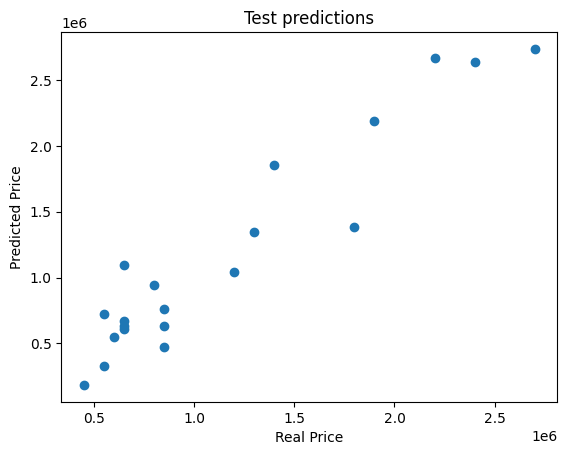

In [187]:
import matplotlib.pyplot as plt

plt.scatter(y_test, pred_test)
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.title("Test predictions")
plt.show()


**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [198]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_num.columns)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled_df, y_train)

coef_df = pd.DataFrame({
    'Feature': X_train_num.columns,
    'Coef': lr_scaled.coef_
}).sort_values(by='Coef', key=abs, ascending=False)

coef_df




,Feature,Coef
5,Power,496769.214899
16,Brand_Mercedes,210048.781148
10,Brand_BMW,208407.313783
9,Brand_Audi,205600.147769
7,Fuel_Type_Code,-183848.018909
13,Brand_Hyundai,-152304.863911
14,Brand_Mahindra,-140945.162904
3,Mileage,-131715.512030
11,Brand_Ford,-118209.450311
8,Transmission_Code,116693.768206


In [189]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['int64','float64']))

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

coeffs = pd.Series(model_scaled.coef_, index=X_train_num.columns)
coeffs.sort_values(key=abs, ascending=False)


,0
Power,496769.214899
Brand_Mercedes,210048.781148
Brand_BMW,208407.313783
Brand_Audi,205600.147769
Fuel_Type_Code,-183848.018909
Brand_Hyundai,-152304.863911
Brand_Mahindra,-140945.162904
Mileage,-131715.512030
Brand_Ford,-118209.450311
Transmission_Code,116693.768206


**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [190]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_train_scaled)

model_sm = sm.OLS(y_train, X_sm).fit()

print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           2.01e-33
Time:                        10:19:15   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   2.74e+04     61.363      0.0

In [ ]:
#Модель з усіма ознаками показала дуже високі значення
#вона пояснює більшу частину варіації ціни.
#Проте велика кількість змінних призвела до мультиколінеарності, і багато коефіцієнтів мають високі p-value, тому не всі ознаки є статистично значущими.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [191]:
significant_features = ['Power', 'Engine', 'Year']

X_sig = X_train_num[significant_features]
X_sig_scaled = scaler.fit_transform(X_sig)

X_sig_sm = sm.add_constant(X_sig_scaled)

model_sig = sm.OLS(y_train, X_sig_sm).fit()
print(model_sig.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     66.32
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           3.61e-21
Time:                        10:19:19   Log-Likelihood:                -1170.0
No. Observations:                  80   AIC:                             2348.
Df Residuals:                      76   BIC:                             2358.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   6.24e+04     26.944      0.0

In [ ]:
#Після відбору ознак за більш строгим критерієм модель стала простішою, але значення
#трохи зменшились. Це означає, що ми втратили частину пояснювальної сили,
#зате отримали більш інтерпретовану модель з меншою кількістю незначущих факторів.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 8? Яку модель з останніх 3х завдань ви б лишили для використання?

In [196]:

X_train_num = X_train.select_dtypes(include=np.number)
X_test_num = X_test.select_dtypes(include=np.number)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_num.columns, index=X_train_num.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_num.columns, index=X_test_num.index)

X_train_const = sm.add_constant(X_train_scaled_df)
model_sm = sm.OLS(y_train, X_train_const).fit()

p_values = model_sm.pvalues
selected_features = p_values[p_values < 0.25].index.drop('const')
print("Відібрані ознаки (p < 0.25):")
print(selected_features)

X_train_selected = X_train_scaled_df[selected_features]
X_test_selected = X_test_scaled_df[selected_features]

X_train_selected_const = sm.add_constant(X_train_selected)
X_test_selected_const = sm.add_constant(X_test_selected)

model_sm_025 = sm.OLS(y_train, X_train_selected_const).fit()

print(model_sm_025.summary())

y_pred_train = model_sm_025.predict(X_train_selected_const)
y_pred_test = model_sm_025.predict(X_test_selected_const)

rmse_train = np.sqrt(np.mean((y_train - y_pred_train)**2))
rmse_test = np.sqrt(np.mean((y_test - y_pred_test)**2))
print(f"RMSE Train: {rmse_train:.2f}, RMSE Test: {rmse_test:.2f}")



Відібрані ознаки (p < 0.25):
Index(['Kilometers_Driven', 'Mileage', 'Power', 'Fuel_Type_Code',
       'Transmission_Code', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti',
       'Brand_Mercedes', 'Brand_Tata', 'Brand_Volkswagen'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           4.85e-38
Time:                        10:29:36   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15            

In [193]:

#У моделі з ознаками при p < 0.25 значення
#значно нижчі, ніж у завданні 8 і, ймовірно, нижчі або близькі до завдання 9.
#Це свідчить, що надто сильне скорочення кількості ознак призвело до втрати важливої інформації.
#Тому найкращим компромісом виглядає модель із завдання 9: вона простіша за модель 8, але зберігає кращу якість, ніж модель 10.

In [197]:
###Аналіз даних cars.csv та побудова моделі лінійної регресії

## 1. Імпорт бібліотек

#import pandas as pd
#import matplotlib.pyplot as plt
#import plotly.express as px
#import plotly.graph_objects as go
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import OrdinalEncoder
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

## 2. Завантаження даних


#cars_df = pd.read_csv('cars.csv')
#cars_df.head()

## 3. Розділення на train/test


#y = cars_df['Price']
#X = cars_df.drop(columns=['Price'])

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.2, random_state=12
#)


## 4. Кодування бінарних колонок

#fuel_major = X_train['Fuel_Type'].value_counts().idxmax()
#trans_major = X_train['Transmission'].value_counts().idxmax()

#X_train['Fuel_Type_Code'] = (X_train['Fuel_Type'] == fuel_major).astype(int)
#X_test['Fuel_Type_Code'] = (X_test['Fuel_Type'] == fuel_major).astype(int)

#X_train['Transmission_Code'] = (X_train['Transmission'] == trans_major).astype(int)
#X_test['Transmission_Code'] = (X_test['Transmission'] == trans_major).astype(int)

## 5. One-Hot Encoding для Brand

#encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#encoder.fit(X_train[['Brand']])

#brand_train = encoder.transform(X_train[['Brand']])
#brand_test = encoder.transform(X_test[['Brand']])

#brand_cols = encoder.get_feature_names_out(['Brand'])

#brand_train_df = pd.DataFrame(brand_train, columns=brand_cols, index=X_train.index)
#brand_test_df = pd.DataFrame(brand_test, columns=brand_cols, index=X_test.index)

#X_train = pd.concat([X_train, brand_train_df], axis=1)
#X_test = pd.concat([X_test, brand_test_df], axis=1)

## 6. Ordinal Encoding для Owner_Type

#ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
#ordenc.fit(X_train[['Owner_Type']])

#X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
#X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

## 7. Видалення нечислових колонок

#X_train_num = X_train.select_dtypes(include=np.number)
#X_test_num = X_test.select_dtypes(include=np.number)

## 8. Кореляційна матриця

#train_corr_df = pd.concat([X_train_num, y_train], axis=1)

#corr = train_corr_df.corr()
#print(corr['Price'].sort_values(ascending=False))

## 9. Навчання LinearRegression

#model = LinearRegression()
#model.fit(X_train_num, y_train)

#train_pred = model.predict(X_train_num)
#test_pred = model.predict(X_test_num)

#rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
#rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))

#print('RMSE train:', rmse_train)
#print('RMSE test:', rmse_test)

## 10. Візуалізація передбачень

#plt.scatter(y_train, train_pred)
#plt.title('Train: Real vs Predicted')
#plt.xlabel('Real')
#plt.ylabel('Predicted')
#plt.show()

#plt.scatter(y_test, test_pred)
#plt.title('Test: Real vs Predicted')
#plt.xlabel('Real')
#plt.ylabel('Predicted')
#plt.show()

## 11. Масштабування

#scaler = StandardScaler()
#scaler.fit(X_train_num)

#X_train_scaled = scaler.transform(X_train_num)
#X_test_scaled = scaler.transform(X_test_num)

## 12. Лінійна регресія на масштабованих даних

#model_scaled = LinearRegression()
#model_scaled.fit(X_train_scaled, y_train)

#coefficients = pd.Series(model_scaled.coef_, index=X_train_num.columns)
#print(coefficients.sort_values(ascending=False))

## 13. Statsmodels (усі ознаки)

#X_train_sm = sm.add_constant(X_train_scaled)
#model_sm = sm.OLS(y_train, X_train_sm).fit()
#print(model_sm.summary())




FileNotFoundError: [Errno 2] No such file or directory: 'cars.csv'